In [103]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt

In [104]:
#Chargement et visualisation des données
data = pd.read_csv('Tobacco3482.csv')
data.head()

,img_path,label
0,Advertisement/0000136188.jpg,Advertisement
1,Advertisement/0000435350.jpg,Advertisement
2,Advertisement/0000556056.jpg,Advertisement
3,Advertisement/0030048095.jpg,Advertisement
4,Advertisement/0030048989.jpg,Advertisement


On observe la distribution des catégories :

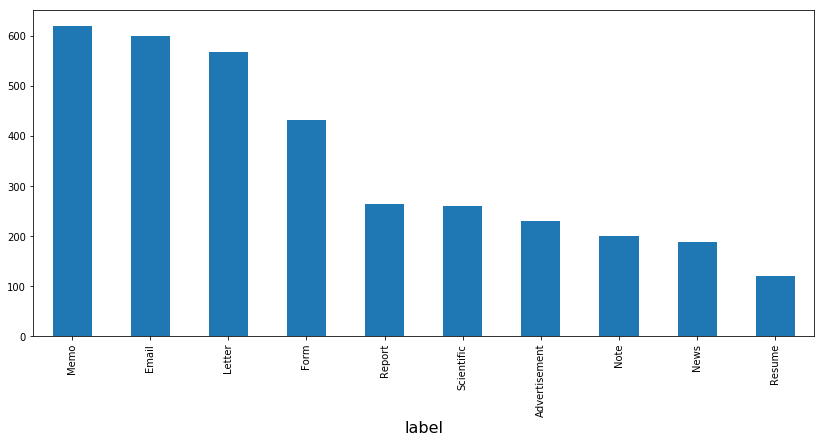

In [110]:
dep = data[["label","nb"]].groupby("label", as_index=True).sum().sort_values("nb",ascending=False)
ax = dep.plot(kind = "bar", figsize=(14,6))
ax.set_xlabel("label", fontsize=16)
ax.legend().set_visible(False)  # on supprime la légende

On remarque qu'il y a 4 catégories qui se demarquent. En effet Email,memo,Letter et Form sont clairement plus représenté que les autres catégories puisque les 3 premières culminent à a peu près 600 suivis de Form qui culmine à 450, le reste des catégories est compris entre 150 pour la plus basse (resume) et 300 pour la plus haute (report).
Neanmoins aucune cattégorie ne peut être marginalisée puisqu'il y a quand meme une bonne representation et un nombre assez raisonnable.

## Premier algorithme Naive Bayes multinomial

In [63]:
#On importe les librairie pour utiliser notre algorithme
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [64]:
list_files = []
for root, dirs, files in os.walk("./data", topdown=False):
    for name in files:
        if ".txt" in os.path.join(root, name) :
            list_files.append(os.path.join(root, name))
list_text = []
for file in list_files:
    file_object = open(file,'r')
    list_text.append(file_object.read())    
dict_data = {}
for i in range(len(data['img_path'])):
    dict_data['./data/Tobacco3482-OCR/'+data['img_path'][i].replace('jpg','txt')] = data['label'][i] 
X = []
y = []
for i in dict_data:
    file_object = open(i,"r")
    X.append(file_object.read())
    file_object.close()
    y.append(dict_data[i])

In [67]:
#On separe nos données 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [77]:
#On commence par appliquer le tf_idf pour maximiser la pertinance de nos résultats 
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(x_train)
x_train_counts = vectorizer.transform(x_train)
x_test_counts = vectorizer.transform(x_test)
tf_transformer = TfidfTransformer().fit(x_train_counts)
x_train_tf = tf_transformer.transform(x_train_counts)
x_test_tf = tf_transformer.transform(x_test_counts)

In [78]:
#On applique le modele 
model = MultinomialNB()
model.fit(x_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
#On prédit nos résultats
predictions = model.predict(x_test_tf)

In [80]:
# On rajoute les librairies permettant de découvrir les résultats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [85]:
report = classification_report(y_test, predictions)
print(report)

               precision    recall  f1-score   support

Advertisement       0.77      0.47      0.58        43
        Email       0.91      0.93      0.92       109
         Form       0.70      0.82      0.75        97
       Letter       0.60      0.76      0.67       114
         Memo       0.50      0.84      0.62       123
         News       0.93      0.54      0.68        48
         Note       0.00      0.00      0.00        43
       Report       0.83      0.10      0.18        51
       Resume       0.97      1.00      0.98        29
   Scientific       0.62      0.45      0.52        40

  avg / total       0.67      0.67      0.64       697



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
#La matrricede confusion est:
mat = confusion_matrix(y_test, predictions)
mat

array([[ 20,   2,   7,   6,   7,   0,   0,   1,   0,   0],
       [  0, 101,   0,   4,   4,   0,   0,   0,   0,   0],
       [  2,   1,  80,   1,  12,   0,   0,   0,   0,   1],
       [  0,   0,   1,  87,  25,   0,   0,   0,   0,   1],
       [  0,   1,   5,  13, 103,   0,   0,   0,   0,   1],
       [  2,   1,   4,   8,   6,  26,   0,   0,   0,   1],
       [  2,   5,  13,   5,  17,   1,   0,   0,   0,   0],
       [  0,   0,   0,  16,  21,   1,   0,   5,   1,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,  29,   0],
       [  0,   0,   5,   5,  12,   0,   0,   0,   0,  18]])

## Passons au MLP

In [95]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(x_train_tf, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [99]:
predictions=model.predict(x_test_tf)
report = classification_report(y_test, predictions)
print(report)

               precision    recall  f1-score   support

Advertisement       0.70      0.72      0.71        43
        Email       0.96      0.90      0.93       109
         Form       0.85      0.85      0.85        97
       Letter       0.77      0.76      0.77       114
         Memo       0.70      0.80      0.75       123
         News       0.75      0.90      0.82        48
         Note       0.72      0.53      0.61        43
       Report       0.46      0.37      0.41        51
       Resume       0.97      1.00      0.98        29
   Scientific       0.57      0.57      0.57        40

  avg / total       0.76      0.77      0.76       697



In [101]:
mat = confusion_matrix(y_test, predictions)
mat

array([[31,  0,  4,  0,  3,  1,  4,  0,  0,  0],
       [ 0, 98,  1,  4,  3,  2,  0,  1,  0,  0],
       [ 7,  1, 82,  0,  2,  1,  1,  3,  0,  0],
       [ 0,  1,  1, 87, 15,  2,  0,  7,  0,  1],
       [ 2,  1,  2, 10, 99,  1,  1,  3,  0,  4],
       [ 0,  0,  0,  0,  2, 43,  1,  1,  0,  1],
       [ 4,  1,  4,  1,  5,  2, 23,  1,  0,  2],
       [ 0,  0,  2, 10,  8,  1,  1, 19,  1,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  1,  1,  4,  4,  1,  6,  0, 23]])